
##*SECTION 1*##
---
# PROJECT
AI 14 강인구

이번 노트는 아래의 구성으로 이뤄져 있습니다.

- **Part 0. Introduction** </br>
  0-1. 기획 배경

- **Part 1. EDA** </br>
  1-1. Data Description

- **Part 2. EDA** </br>
  2-1. 데이터 정제 </br>
  2-2. Feature Engineering </br>
  2-3. Log Transformation </br>
  2-4. Data Scaling </br>

- **Part 3. Build Clustering Model** </br>
  3-1. K-Means Clustering </br>
  3-2. Elbow Method </br>

- **Part 4. 클러스터별 특징 분석**

---

# PART 0. Introduction

###**1. 기획배경**

다음 분기에 어떤 게임을 설계해야 할까

대상자: 비데이터 직군

*  Sprint 1 : EDA, Feature Engineering, Data Manipulation, Data Visualization
*  Sprint 2 : Hypothesis Test, CI, Bayesian, AB Test
*  Sprint 3 : DR, PCA, Clustering, GD

최근 연도 플롯 불러와서 판매량 확인


가설검정 : 연도별과 게임 장르별 영향이 있다?

최근 유행 트랜드 조사

많이 팔린 게임 조사

->많이 팔린 게임 데이터를 분류해서 게임의 장르를 확인한다.

->장르별 구분해서 판매량 연도 확인 데이터를 종합해서




In [61]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

In [ ]:
# 파일 불러오기 (local에서 업로드)
from google.colab import files
files.upload()

In [63]:
games = pd.read_csv('vgames2.csv', sep=",")
games.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [64]:
#첫번째 unnamed:0은 인덱스와 겹치기에 삭제
games= games.drop(games.columns[[0]],axis=1)
games

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [65]:
print(f'Shape of dataset: {games.shape} \n')

games.info()

Shape of dataset: (16598, 9) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB



1.   지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.

2.   연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.

3.   출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

# 데이터 정제

###**a. Name**



> 게임 이름의 데이터에 문제 있는지 먼저 확인한다.



In [66]:
#결측치(missing value) 확인
games.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64


  > 확인 결과 이름의 값에는 결측치를찾을 수 없다. 그러나 Year,Genre, Publisher에 따른 결측치를 발견했다.

---









###**b. Year**



> 먼저 결측값의 크기는 전체 데이터의 양에 비해 적으므로 제거를 진행했다. 



In [8]:
#년도에 대한 문제 
#판매량에 대한 문제: 기본 단위가 백만장인걸로 판단
#1000000
#테트리스 판매량으로 파악했습니다. 
#데이터판매량 K는 1000이므로 
#단위에 맞추어 
#K=1000/1000000
#K는 0.001로 수정합니다. 
#장르는 한번 확인해보고 진행
#판매사 파트는 삭제는 하지 않습니다.
#K: 1e-3

In [67]:
games.dropna(subset=['Year'], inplace=True)
games.isnull().sum()

Name            0
Platform        0
Year            0
Genre          50
Publisher      36
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64



> 결측치 제거 후 데이터에 대해 더 자세히 조사해보았다.



In [68]:
games.Year.describe()

count    16327.000000
mean      1994.242543
std        155.077168
min          0.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64



> 최초의 비디오게임은 1958년에 만들어졌기에 이하의 값은 삭제합니다. 



(array([ 107.,   64.,   89.,  438., 1256., 2413., 3881., 5205., 2381.,
         343.]),
 array([1980., 1984., 1988., 1992., 1996., 2000., 2004., 2008., 2012.,
        2016., 2020.]),
 <a list of 10 Patch objects>)

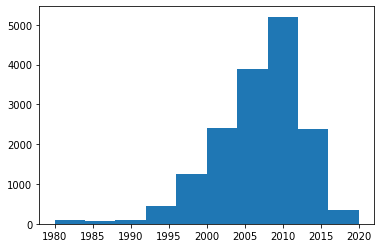

In [73]:

#만약 프로젝트 기간동안 시간이 난다면 50년도 기준으로 
#이하면 +2000 이상이면 +1900하는 구조로 바꾼다. 단점은 데이터의 정확성을 문제이다.
plt.hist(games.Year)

In [74]:

delete_index = games[games.Year<1958].index
games= games.drop(index = delete_index)

In [75]:
games.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher      36
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

###**c. Genre**



> 장르의 결측값은 50으로 전체 데이터 수에 비해 적기에 삭제를 진행했다.



In [76]:
#판매량이 높은 게임 중에서 장르가 없는 경우가 거의 없고
#장르가 없는 것은 추측할 수 없기에 이 또한 삭제한다.
games.dropna(subset=['Genre'], inplace=True)
games.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher      36
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

###**c. Sales**



> Sales data에 M과 K라는 문자가 들어간 데이터가 발견되었다. 

>1989년 테트리스 판매량을 찾아본 결과, 해당 데이터의 기본 단위는 M(1000,000)으로 판단되었다.그래서 K는 0.001, M은 1로 바꾸어 해당데이터에 곱해주었다. 



In [77]:
#df["A"].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)
#데이터 타입 변경 object에서 float으로
games['NA_Sales']=games['NA_Sales'].replace({"K": "*1e-3","M":"*1","k":"*1e-3","m":"*1"},regex=True).map(pd.eval).astype(float)
games['JP_Sales']=games['JP_Sales'].replace({"K": "*1e-3","M":"*1","k":"*1e-3","m":"*1"},regex=True).map(pd.eval).astype(float)
games['Other_Sales']=games['Other_Sales'].replace({"K": "*1e-3","M":"*1","k":"*1e-3","m":"*1"},regex=True).map(pd.eval).astype(float)
games['EU_Sales']=games['EU_Sales'].replace({"K": "*1e-3","M":"*1","k":"*1e-3","m":"*1"},regex=True).map(pd.eval).astype(float)

###**d. Others**



> 퍼블리셔가 저희가 어떤 게임을 설계할까? 에 대한 문제에서 벗어나고 1인 개발자 같은 경우에 퍼블리셔가 없을 수 있기에 결측값에 대해 삭제를 진행하지 않습니다. 




# 지역에 따라서 선호하는 게임 장르가 다를까?

In [78]:
#1.   지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
games_regeion=games.groupby(games.Genre)['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum()
games_regeion

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,855.99,512.52,155.74,183.64
Adventure,101.46,63.37,51.81,16.64
Fighting,220.11,99.72,86.39,36.10
Misc,399.85,209.73,103.71,72.64
Platform,442.46,199.42,129.22,51.15
Puzzle,121.00,50.40,56.19,12.39
Racing,353.57,234.21,55.42,76.23
Role-Playing,307.08,176.32,336.25,54.71
Shooter,570.89,307.26,37.34,100.82




> 이렇게 보아도 시각적으로 지역에 따라 선호하는 게임의 장르가 다른지 알아보기 힘들다. 





> 그래서 T-Test와 같은 방식으로 하는 ANOVA 분석을 합니다. 



In [79]:
import scipy.stats as stats
import pandas as pd

In [80]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16177 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16177 non-null  object 
 1   Platform     16177 non-null  object 
 2   Year         16177 non-null  float64
 3   Genre        16177 non-null  object 
 4   Publisher    16141 non-null  object 
 5   NA_Sales     16177 non-null  float64
 6   EU_Sales     16177 non-null  float64
 7   JP_Sales     16177 non-null  float64
 8   Other_Sales  16177 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.2+ MB


In [81]:
games_model= games[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
games_model
G1_Action= games_model[games_model.Genre=='Action']
G1_Adventure=games_model[games_model.Genre=='Adventure']
G1_Fighting=games_model[games_model.Genre=='Fighting']
G1_Misc=games_model[games_model.Genre=='Misc']
G1_Platform=games_model[games_model.Genre=='Platform']
G1_Puzzle =games_model[games_model.Genre=='Puzzle']
G1_Racing =games_model[games_model.Genre=='Racing']
G1_RolePlaying =games_model[games_model.Genre=='Role-Playing']
G1_Shooter =games_model[games_model.Genre=='Shooter']
G1_Simulation =games_model[games_model.Genre=='Simulation']
G1_Sports =games_model[games_model.Genre=='Sports']
G1_Strategy =games_model[games_model.Genre=='Strategy']

In [82]:
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
games_modelNA = pd.DataFrame(games, columns=['NA_Sales','Genre'])
modelNA = ols('NA_Sales ~ C(Genre)',games_modelNA).fit()


In [83]:
print(anova_lm(modelNA))

               df        sum_sq    mean_sq          F        PR(>F)
C(Genre)     11.0    168.362802  15.305709  23.003916  1.602570e-47
Residual  16165.0  10755.420727   0.665352        NaN           NaN


In [84]:
games_modelEU = pd.DataFrame(games, columns=['EU_Sales','Genre'])
modelEU = ols('EU_Sales ~ C(Genre)',games_modelEU).fit()
print(anova_lm(modelEU))

               df       sum_sq   mean_sq          F        PR(>F)
C(Genre)     11.0    41.648048  3.786186  14.812903  4.795308e-29
Residual  16165.0  4131.782824  0.255601        NaN           NaN


In [85]:
games_modelJP = pd.DataFrame(games, columns=['JP_Sales','Genre'])
modelJP = ols('JP_Sales ~ C(Genre)',games_modelJP).fit()
print(anova_lm(modelJP))

               df       sum_sq   mean_sq          F         PR(>F)
C(Genre)     11.0    49.399602  4.490873  49.393714  1.362193e-107
Residual  16165.0  1469.720640  0.090920        NaN            NaN


In [86]:
games_modelOT = pd.DataFrame(games, columns=['Other_Sales','Genre'])
modelOT = ols('Other_Sales ~ C(Genre)',games_modelOT).fit()
print(anova_lm(modelOT))

               df      sum_sq   mean_sq          F        PR(>F)
C(Genre)     11.0    4.980922  0.452811  12.677558  2.734301e-24
Residual  16165.0  577.373900  0.035718        NaN           NaN


a= 0.05 이하이기에 귀무가설을 기각하고 대립 가설인 지역마다 장르에 따라서 판매량의 차이가 있다는 것을 알수 있다.  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

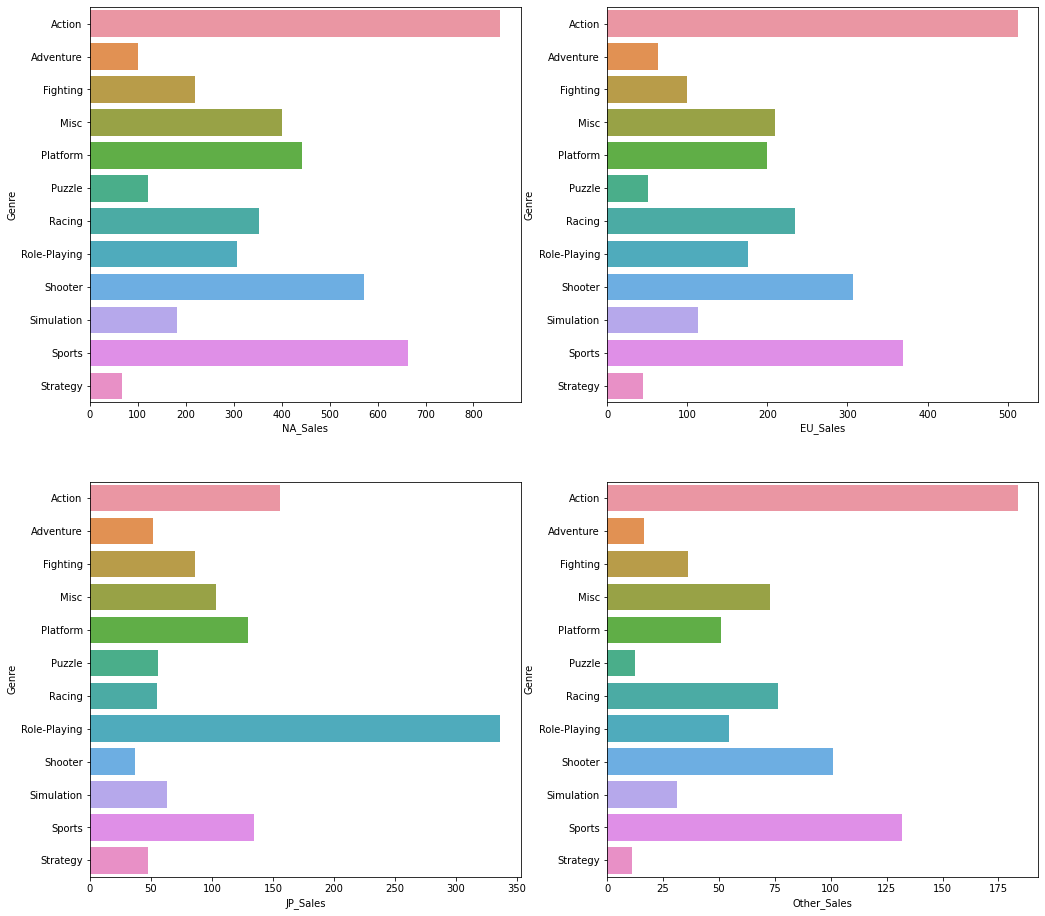

In [87]:
games_regeionNA=games.groupby('Genre', as_index=False )['NA_Sales'].sum()
games_regeionEU=games.groupby('Genre', as_index=False )['EU_Sales'].sum()
games_regeionJP=games.groupby('Genre', as_index=False )['JP_Sales'].sum()
games_regeionOT=games.groupby('Genre', as_index=False )['Other_Sales'].sum()

fig, ax= plt.subplots(ncols=2, nrows=2, figsize=(17,16))
sns.barplot(games_regeionNA['NA_Sales'],games_regeionNA['Genre'], ax= ax[0,0])
sns.barplot(games_regeionEU['EU_Sales'],games_regeionEU['Genre'], ax= ax[0,1])
sns.barplot(games_regeionJP['JP_Sales'],games_regeionJP['Genre'], ax= ax[1,0])
sns.barplot(games_regeionOT['Other_Sales'],games_regeionOT['Genre'], ax= ax[1,1])

<Figure size 7200x7200 with 0 Axes>

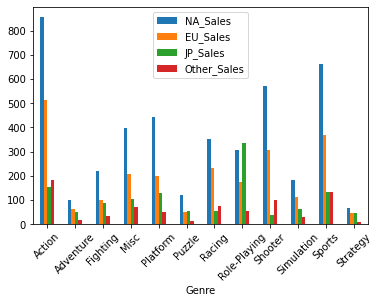

In [88]:
plt.figure(figsize=(100,100))
games_regeion.plot.bar(rot=0)
plt.xticks(rotation=45)
plt.show()

In [ ]:
#1.   지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
# NA(북아메리카)같은 경우 platform 게임을 제일 선호하고
# EU(유럽)같은 경우 shooter 게임을 제일 선호합니다.
# JP(일본) 같은 경우 role_playing 게임을 제일 선호합니다.
# Other(이외 지역)같은 경우 shooter 게임을 가장 선호합니다.

# 2.   연도별 게임의 트렌드가 있을까

In [98]:
#2.   연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
game_all= games.copy()

In [99]:
game_all['All_Sales']= game_all['NA_Sales']+game_all['EU_Sales']+game_all['JP_Sales']+game_all['Other_Sales']


In [100]:
games_year=game_all.groupby(['Year','Genre'],as_index=False)['All_Sales'].sum()
games_year


,Year,Genre,All_Sales
0,1980.0,Action,0.34
1,1980.0,Fighting,0.77
2,1980.0,Misc,2.70
3,1980.0,Shooter,7.07
4,1981.0,Action,14.79
...,...,...,...
383,2016.0,Sports,14.46
384,2016.0,Strategy,0.52
385,2017.0,Action,0.01
386,2017.0,Role-Playing,0.04


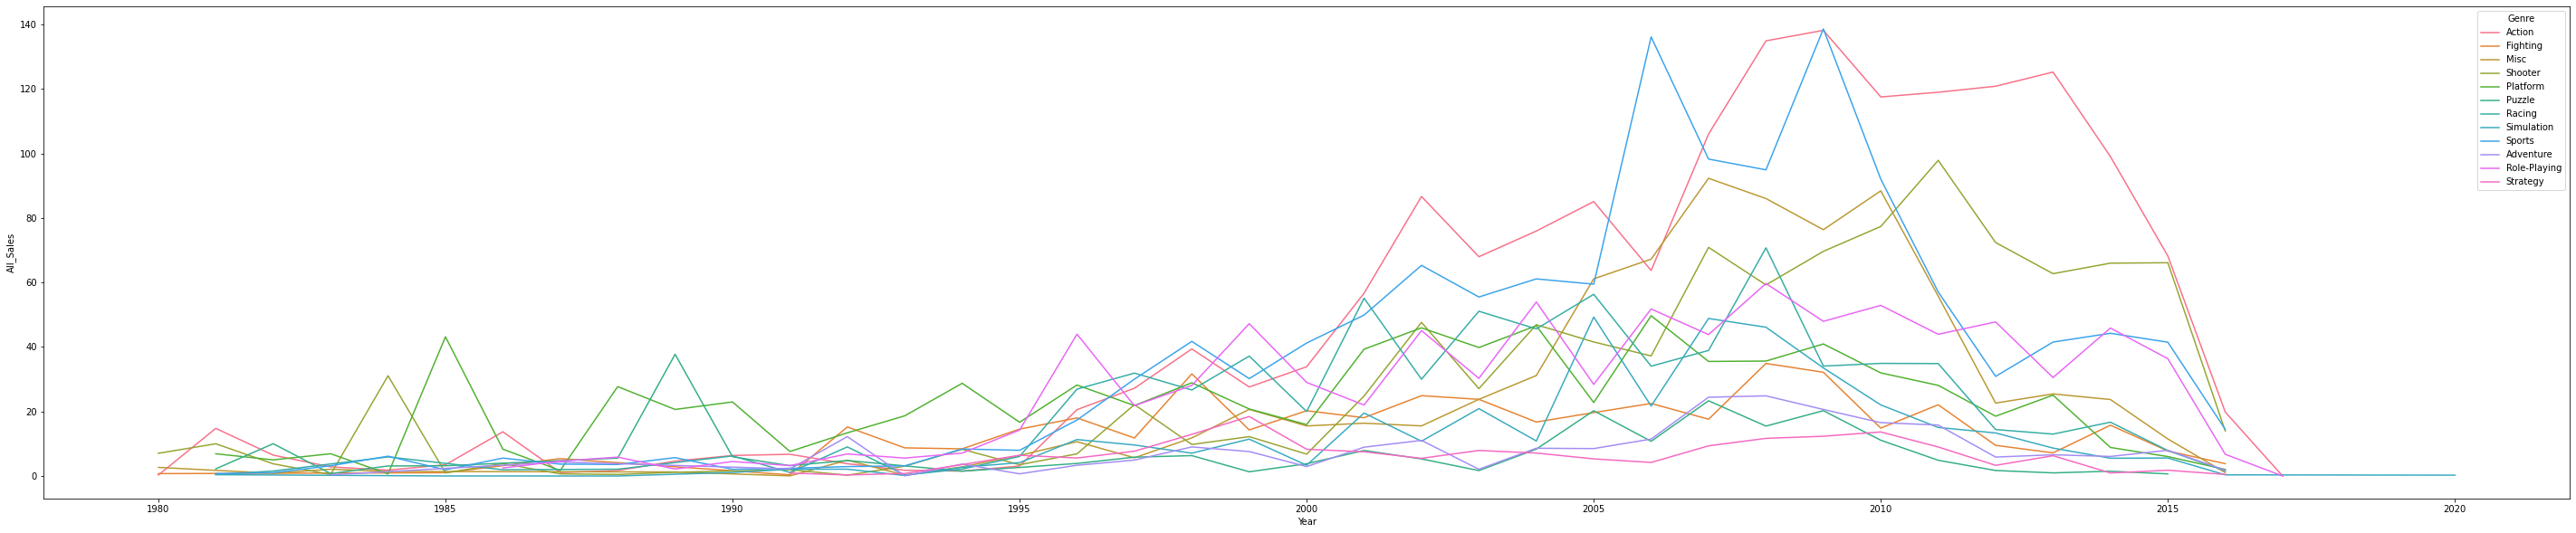

In [101]:
plt.figure(figsize=(50,10))
sns.lineplot(x='Year',y='All_Sales',data=games_year,hue='Genre',)

자세히 보다보니 2006년도와 2009년의 스포츠 데이터가 높다. 2006년 월드컵과 2008 베이징 올림픽의 영향이 있다고 생각한다. 

데이터가 방대하고 너무 넓어서 알아보기 힘들다. 일단 5년 정도로 묶어서 연도별 트렌드를 알아보도록 하자

In [102]:
def find_5Year(Years):
  if Years>= 1980.0 and Years < 1985.0:
    return '80-84'
  elif Years>= 1985.0 and Years <1990.0:
    return '85-89'
  elif Years>= 1990.0 and Years <1995.0:
    return '90-94'
  elif Years>= 1995.0 and Years <2000.0:
    return '95-99'
  elif Years>= 2000.0 and Years <2005.0:
    return '00-04'   
  elif Years>= 2005.0 and Years <2010.0:
    return '05-09'    
  elif Years>= 2010.0 and Years <2015.0:
    return '10-14'
  else:
    return '15-20'

games_year['Years']= [find_5Year(e) for e in games_year.Year]

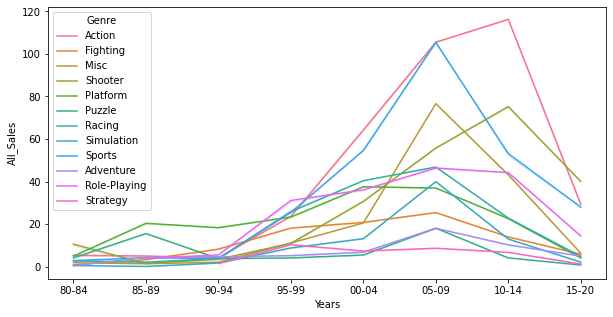

In [103]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Years',y='All_Sales',data=games_year,hue='Genre',ci=False)

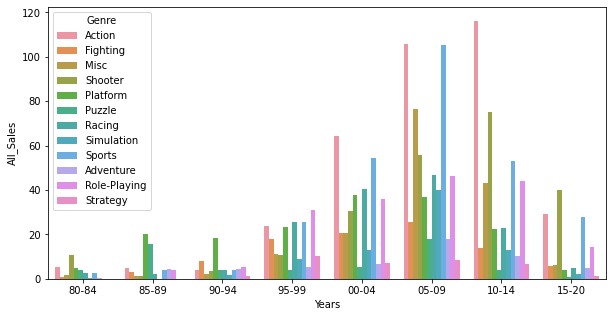

In [104]:
plt.figure(figsize=(10,5))
#plt.xticks(rotation=45)
sns.barplot(x='Years',y='All_Sales',data=games_year,hue='Genre', ci=False)

In [105]:
games_year2=game_all.groupby(['Year','Genre']).sum()
games_year2.drop(columns=["NA_Sales","EU_Sales","JP_Sales","Other_Sales"],axis=1)

All_Sales
Year   Genre                  
1980.0 Action             0.34
       Fighting           0.77
       Misc               2.70
       Shooter            7.07
1981.0 Action            14.79
...                        ...
2016.0 Sports            14.46
       Strategy           0.52
2017.0 Action             0.01
       Role-Playing       0.04
2020.0 Simulation         0.29

[388 rows x 1 columns]

게임의 트렌드에는 장르뿐만 아니라 플랫폼도 있다. 확인해보자

In [106]:
games_platform=game_all.groupby(['Year','Platform'],as_index=False)['All_Sales'].sum()
games_platform

,Year,Platform,All_Sales
0,1980.0,2600,10.88
1,1981.0,2600,35.68
2,1982.0,2600,28.88
3,1983.0,2600,5.84
4,1983.0,NES,10.96
...,...,...,...
236,2016.0,X360,0.83
237,2016.0,XOne,12.38
238,2017.0,PS4,0.03
239,2017.0,PSV,0.02


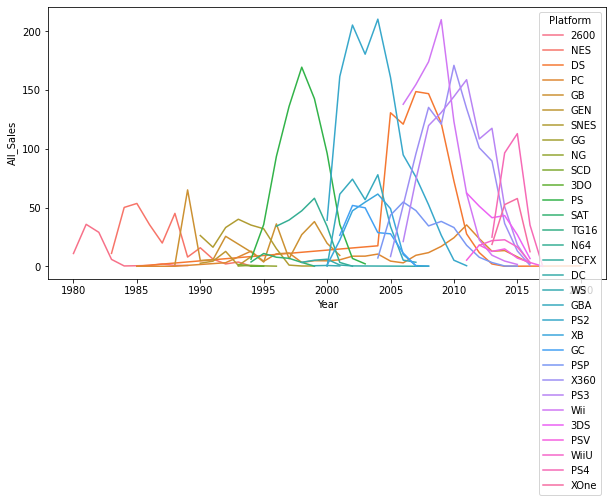

In [109]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Year',y='All_Sales',data=games_platform,hue= 'Platform',ci=False)

In [111]:
def find_5Year(Years):
  if Years>= 1980.0 and Years < 1985.0:
    return '80-84'
  elif Years>= 1985.0 and Years <1990.0:
    return '85-89'
  elif Years>= 1990.0 and Years <1995.0:
    return '90-94'
  elif Years>= 1995.0 and Years <2000.0:
    return '95-99'
  elif Years>= 2000.0 and Years <2005.0:
    return '00-04'   
  elif Years>= 2005.0 and Years <2010.0:
    return '05-09'    
  elif Years>= 2010.0 and Years <2015.0:
    return '10-14'
  else:
    return '15-20'
games_platform['Years']= [find_5Year(e) for e in games_platform.Year]

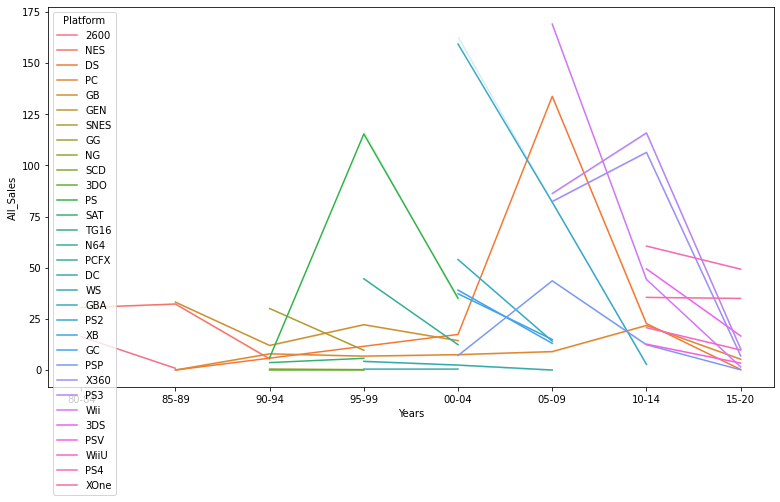

In [113]:
plt.figure(figsize=(13,7))
sns.lineplot(x='Years',y='All_Sales',data=games_platform,hue= 'Platform',ci=False)

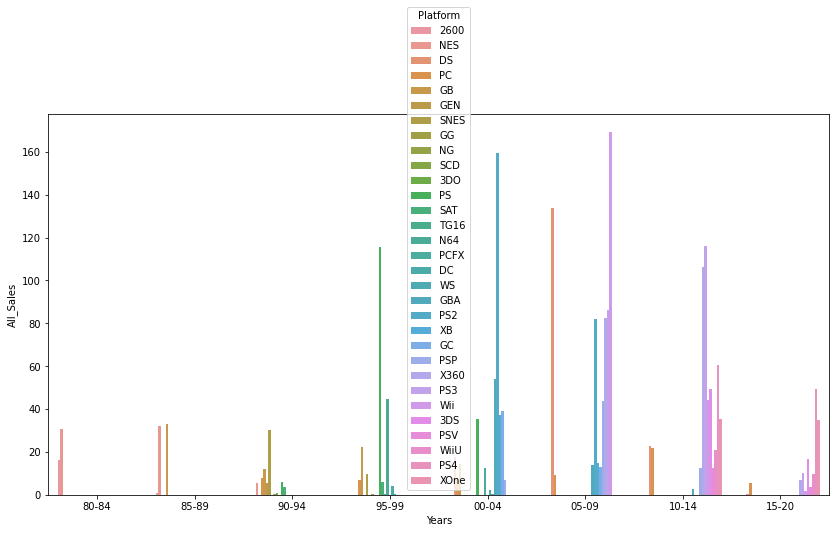

In [115]:
plt.figure(figsize=(14,7))

sns.barplot(x='Years',y='All_Sales',data=games_platform,hue= 'Platform',ci=False)

In [57]:
games_platform2 = game_all[['Year','Platform']]
games_platform2

,Year,Platform
0,2008.0,DS
1,2009.0,Wii
2,2010.0,PSP
3,2010.0,DS
4,2010.0,PS3
...,...,...
16593,2006.0,GC
16594,2005.0,PSP
16595,2015.0,PS3
16596,2013.0,PSV


In [116]:
#출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.
game_asc= game_all.sort_values(by=['All_Sales'], ascending=False)
game_asc.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4199,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12579,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7829,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
1203,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6937,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
3014,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
16531,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
10488,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [ ]:
#상위권 게임기 출고량y축 연도 x축 으로 hue는 장르 scatter plot

In [27]:
game_asc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16177 entries, 2908 to 5598
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16177 non-null  object 
 1   Platform     16177 non-null  object 
 2   Year         16177 non-null  float64
 3   Genre        16177 non-null  object 
 4   Publisher    16141 non-null  object 
 5   NA_Sales     16177 non-null  float64
 6   EU_Sales     16177 non-null  float64
 7   JP_Sales     16177 non-null  float64
 8   Other_Sales  16177 non-null  float64
 9   All_Sales    16177 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [119]:
#상위권 데이터는 일단 10%로 스캐터 플롯 구성
game_per= game_asc.head(10) 
game_per1= game_per[['Name','All_Sales']]

In [124]:
game_per_sum= game_per1['All_Sales'].sum()
game_per1['Sales_per']= game_per1['All_Sales']/game_per_sum
game_per1.drop(['All_Sales'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [130]:
game_per1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 2908 to 10488
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       10 non-null     object 
 1   Sales_per  10 non-null     float64
dtypes: float64(1), object(1)
memory usage: 240.0+ bytes


In [ ]:
# explodes=[0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05]
game_per1['Sales_per']=game_per1['Sales_per']*100

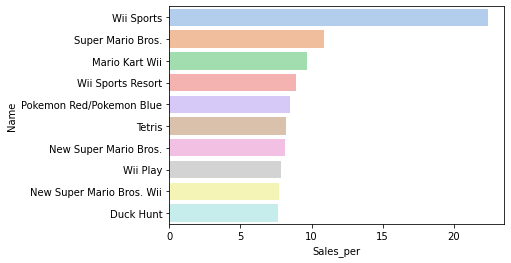

In [142]:
sns.barplot(y='Name', x='Sales_per',data=game_per1,ci=False,alpha=0.9,palette='pastel')

# 새 섹션

In [32]:
game_100 = game_asc.head(100)

가설검정: 연도에 따라 판매량이 크거나 같다

대립가설: 연도에 따라 판매량이 줄어든다. 